<a href="https://colab.research.google.com/github/Naveen-01A/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Analysis**


Project Type - EDA


Contribution - Individual

Name - Naveen Akula

**GitHub Link:**

#Project Summary -

Exploratory Data Analysis (EDA) on Hotel Booking Dataset

The objective of this project was to conduct Exploratory Data Analysis (EDA) on a hotel booking dataset to uncover insights into customer behavior and booking patterns. The dataset encompassed diverse information about hotel bookings, including booking dates, customer demographics, and reservation details. Our analysis comprised two main stages: data cleaning and preprocessing, followed by data visualization using various graphical techniques.

Data Cleaning and Preprocessing:

In the initial phase, we focused on cleaning and preprocessing the dataset to ensure its quality and integrity. This involved removing missing values and handling duplicates to create a reliable foundation for our analysis.

Data Visualization:

Subsequently, we employed a range of graphical techniques to visualize the data effectively. Histograms, scatter plots, and heatmaps were among the visualization methods utilized. These techniques provided comprehensive insights into the data distribution, relationships between variables, and underlying patterns.

Key Insights:

Through our analysis, we unearthed several intriguing insights. Notably, we discovered that the majority of bookings occurred during the months of July and August. This observation sheds light on the peak season for hotel reservations, offering valuable insights into customer behavior and booking trends.


In conclusion, our EDA project on the hotel booking dataset enabled us to gain valuable insights into customer behavior and booking patterns. By cleaning, preprocessing, and visualizing the data, we uncovered significant trends and patterns that can inform strategic decision-making in the hotel industry. Moving forward, further analysis and exploration of the dataset could unveil additional insights and opportunities for optimization.

# Problem Statement

This report focuses on the analysis of hotel booking cancellations and other factors that do not directly impact the business and annual revenue generation of both the City Hotel and Resort Hotel. In recent years, both hotels have seen significant increases in their cancellation rates, leading to challenges such as reduced revenue and underutilized hotel rooms. Therefore, the top priority for both hotels is to reduce their cancellation rates, which will enhance their efficiency in revenue generation. Through this analysis, we aim to identify factors contributing to cancellation rates and propose strategies to mitigate them, ultimately improving the overall performance of both hotels.

INTRODUCTION

In the past few years, both the City Hotel and Resort Hotel have experienced significant increases in their cancellation rates. As a result, both hotels are currently facing a range of challenges, such as reduced revenue and underutilized hotel rooms. Therefore, the top priority for both hotels is to reduce their cancellation rates, which will enhance their efficiency in generating revenue. This report focuses on the analysis of hotel booking cancellations and other factors that do not directly impact their business and annual revenue generation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [2]:
df = pd.read_csv("/content/Hotel Bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
#checking the shape ( rows and column numbers)

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

df.shape

 We have total 119390 rows and 32 columns.


(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Description:

1. hotel : Hotel(Resort Hotel or City Hotel)

2. is_canceled : Value indicating if the booking was canceled (1) or not (0)

3. lead_time :* Number of days that elapsed between the entering date of the
  booking into the PMS and the arrival date*

4. arrival_date_year : Year of arrival date

5. arrival_date_month : Month of arrival date

6. arrival_date_week_number : Week number of year for arrival date

7. arrival_date_day_of_month : Day of arrival date

8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9. stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10. adults : Number of adults

11. children : Number of children

12. babies : Number of babies

13. meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

14. country : Country of origin.`

15. market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16. distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17. is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

18. previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

19. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20. reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. assigned_room_type : Code for the type of room assigned to the booking.

22. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23. deposit_type : Indication on if the customer made a deposit to guarantee the booking.

24. agent : ID of the travel agency that made the booking

25. company : ID of the company/entity that made the booking or responsible for paying the booking.

26. days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

27. customer_type : Type of booking, assuming one of four categories

28. adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. required_car_parking_spaces : Number of car parking spaces required by the customer

30. total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. reservation_status : Reservation last status, assuming one of three categories

* Canceled - booking was canceled by the customer
* Check-Out - customer has checked in but already departed
* No-Show - customer did not check-in and did inform the hotel of the reason why

32. reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel









In [8]:
#checking for outliers

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# creating a copy of our dataset

df1=df.copy()

In [10]:
# columns name list

print(list(df1.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [11]:
# converting object type to datetime

df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')



In [12]:
# checking for the duplicate rows

df1.duplicated().value_counts()    #true means duplicate rows

False    87396
True     31994
Name: count, dtype: int64

<Axes: xlabel='None', ylabel='count'>

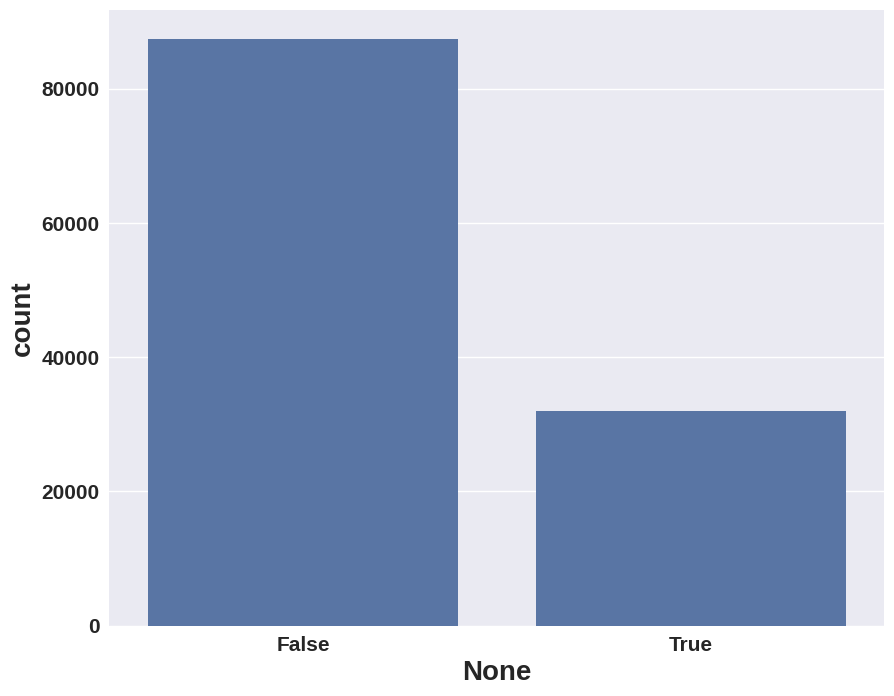

In [13]:
# Visulizing through Count pot

plt.figure(figsize=(10,8))
sns.countplot(x=df1.duplicated())



So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [14]:
#dropping the duplicate rows

df1= df1.drop_duplicates()

In [15]:
# data set reduced

df1.shape

(87396, 32)

In [16]:
#checking for Null Values

df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})


,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

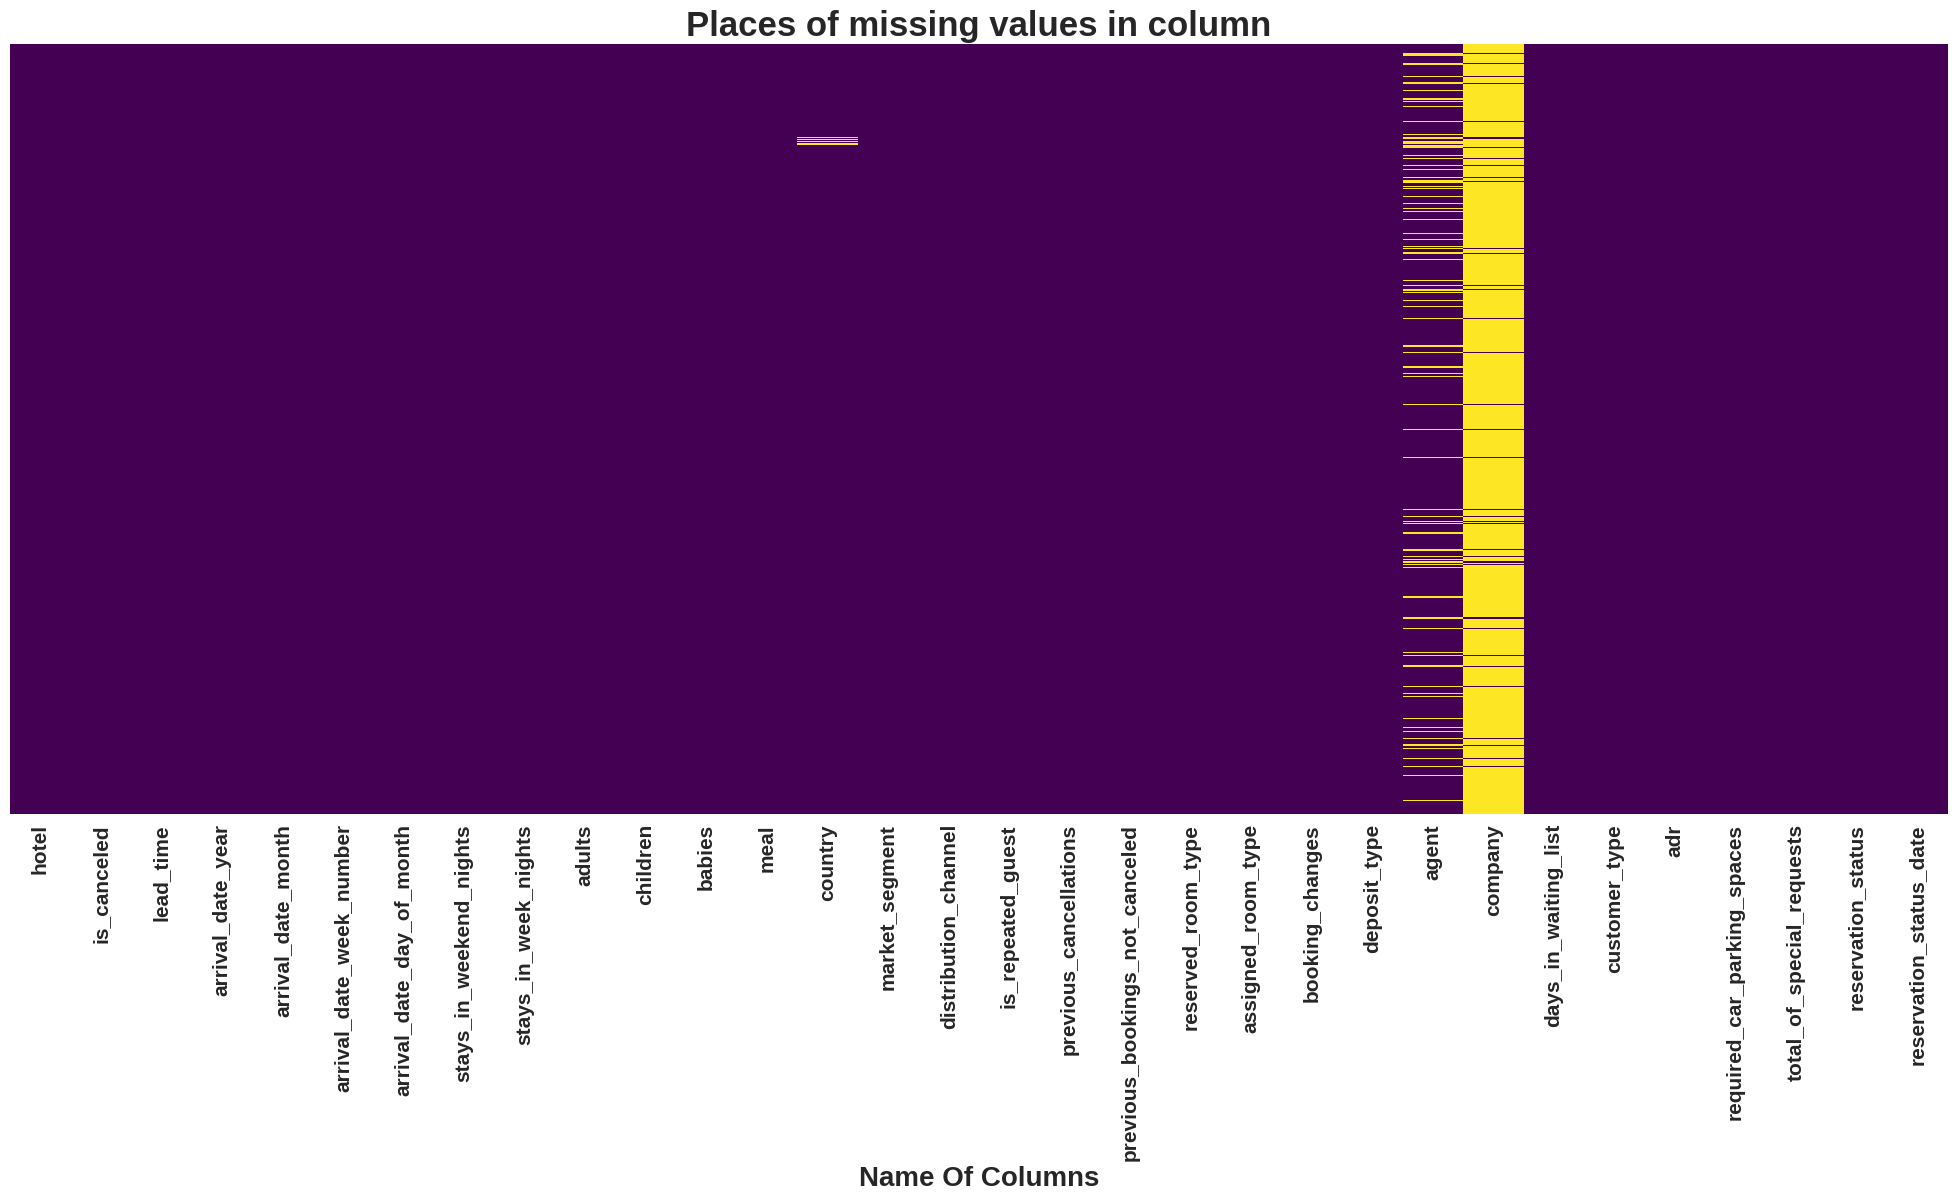

In [17]:
# Visulaizing null values through heatmap.

plt.figure(figsize=(25, 10))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")


So we Have Null values in columns- Company, agent, Country,children.

1. for company and agent I will fill the Missing values with 0
2.for country I will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
3. AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [18]:
# dropping / Missing null values with 0.

null_columns=['agent','children','company']
for col in null_columns:
  df1[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)


In [19]:
df1.dropna(inplace=True)

In [20]:
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [21]:
df1.shape

(87396, 32)

In [22]:
#Successfully handled  Null Values

df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})


,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [23]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.

len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)


In [24]:
# Checking the unique values in categorical columns.

categorical_cols=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')
  print('--'*70)


Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
-

In [25]:
df = df[df['adr']<5000]

In [26]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934,2016-08-31 02:54:22.492261888
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051,NaN


In [27]:
# lets add some new columns.

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

In [28]:
# Checking the final rows and columns.

df1.shape

(87230, 34)

# EDA (Exploratory Data Analysis)


# Univariate Analysis

Univariate analysis is a statistical analysis technique that involves analyzing and describing a single variable in a dataset.

1) Which type of hotel is mostly prefered by the guests?

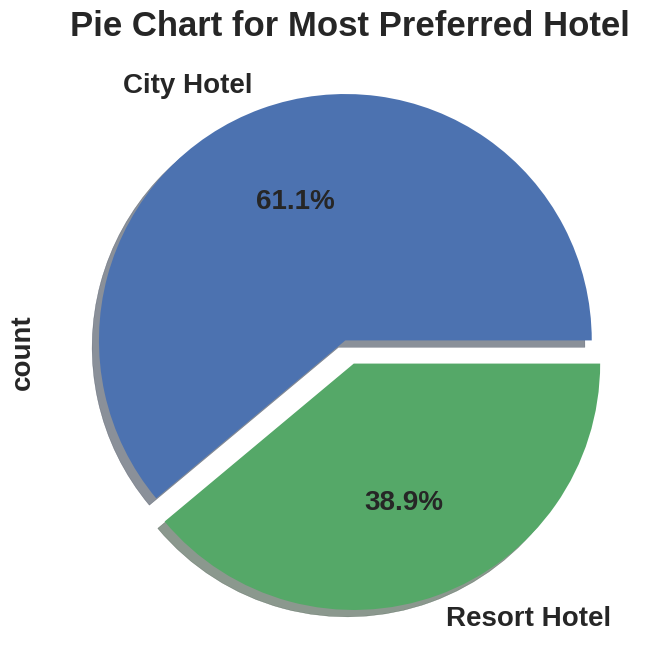

In [29]:
# Count the number of each hotel type
hotel_counts = df1['hotel'].value_counts()

# Determine the explode values based on the number of categories
explode = [0.05] * len(hotel_counts)

# Plot the pie chart
plt.figure(figsize=(10, 8))
df1['hotel'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(10, 8), fontsize=20)
plt.title('Pie Chart for Most Preferred Hotel')
plt.show()

**Observation**

Pie chart is used to represents the proportions of the whole dataset'

City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

2) Which Agent made the most bookings?

In [30]:
# return highest bookings made by agents

highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

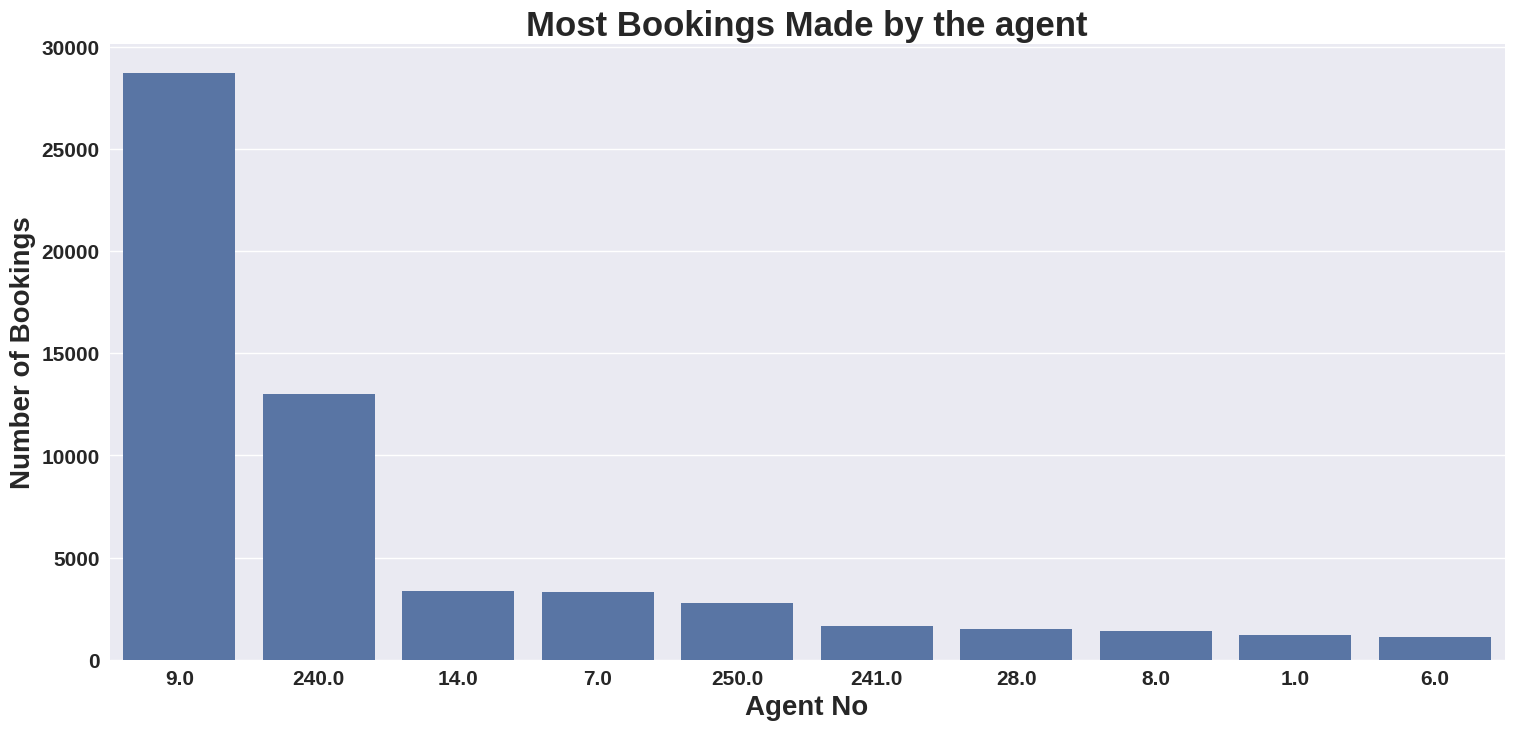

In [31]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


**Observation**

Bar plots are effective for comparison between categories.

Agent ID no: 9 made most of the bookings

It will help us to who and  which id most of the customers using for booking process.

3)What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

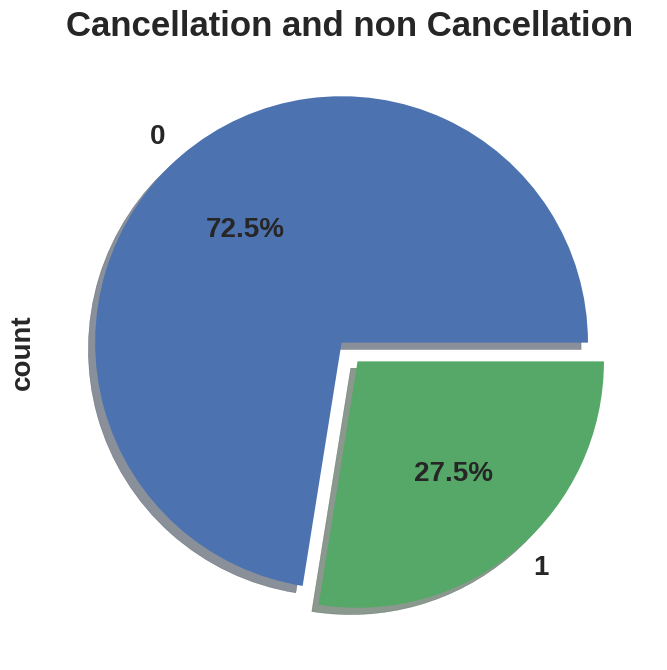

In [32]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")



**Observation :**

The above plot suitable to represent the whole data.

0= not cancled

1= canceled

27.5% of the bookings were cancelled.

4) What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentage (%) of repeated guests')

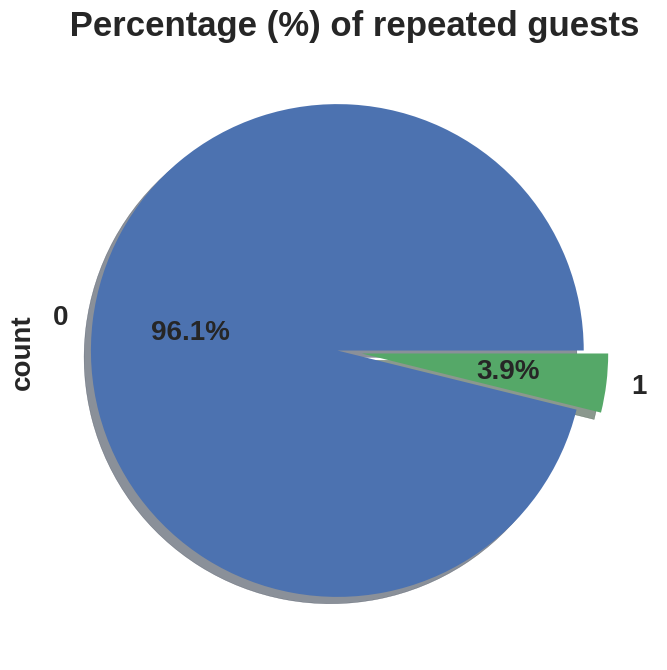

In [33]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentage (%) of repeated guests")


**Observation:**

 Pie chart used to show percentage of repeated guests.

Repeated guests are very few which only 3.9 %.

In order to retained the guests management should take feedbacks from guests and try to imporve the services.

5) What is the percentage distribution of "Customer Type"?

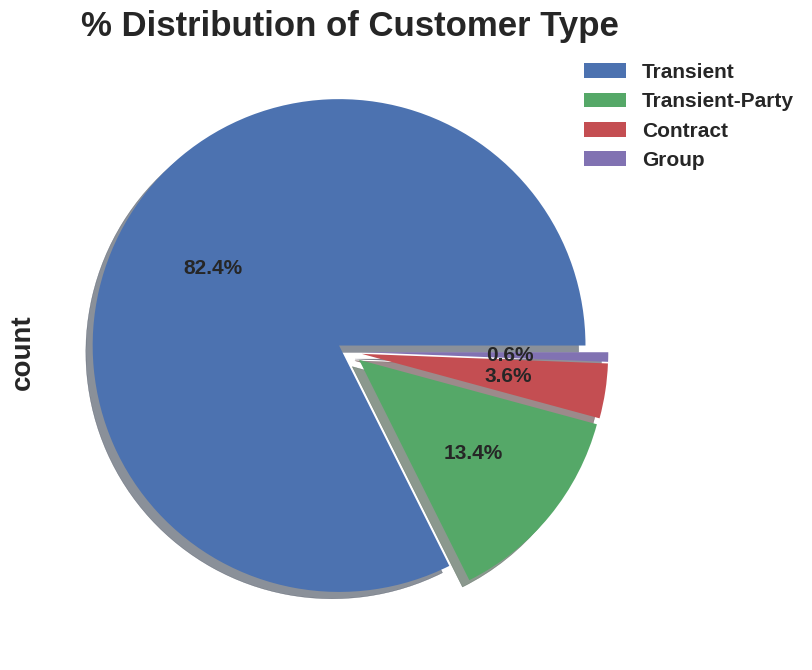

In [34]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


1. Contract

when the booking has an allotment or other type of contract associated to it

2. Group

when the booking is associated to a group

3. Transient

when the booking is not part of a group or contract, and is not associated to other transient booking

4. Transient-party

when the booking is transient, but is associated to at least other transient booking

**Observation:**

The above chart is useful for relative proportions of a set of values to compare parts of whole'

Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low.

6)What is the percentage distribution of required_car_parking_spaces?

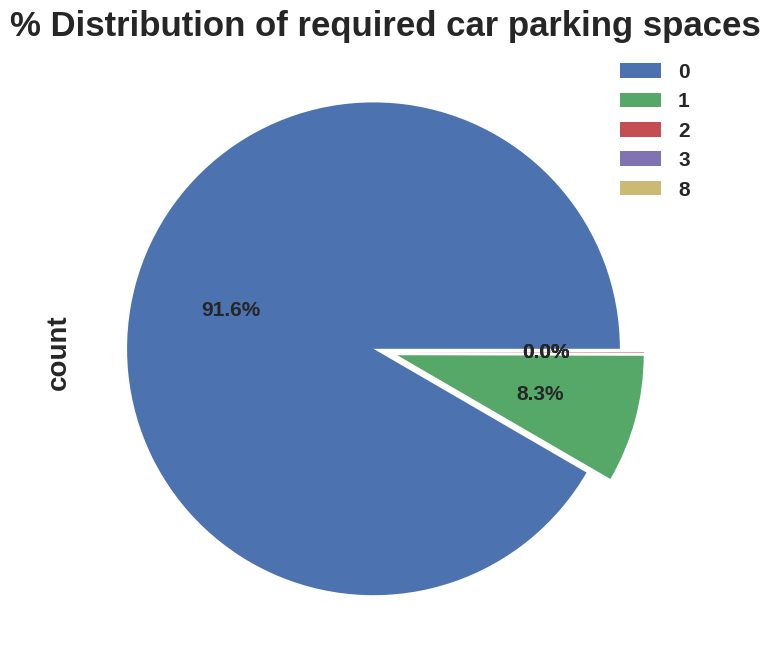

In [35]:


df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**

91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

It will help us to know the parkig slot is to be maintained or not.

7)What is Percentage distribution of Deposite type ?

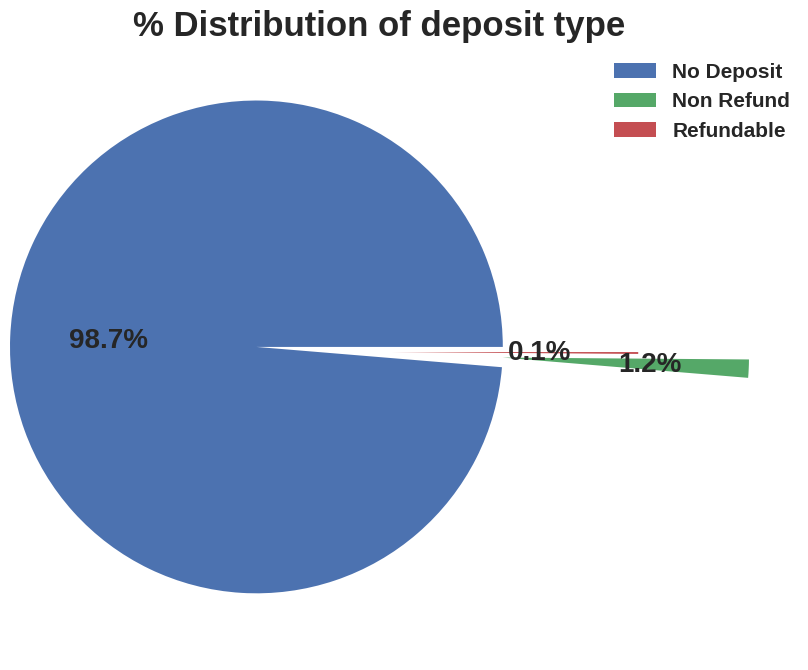

In [36]:


df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**

98.1 % of the guests prefer "No deposit" type of deposit.

It shows that almost every don't like deposite amount, so it useful to understands the customers mindset.

8) Which type of food is mostly preferred by the guests?

Text(0.5, 1.0, 'Preferred Meal Type')

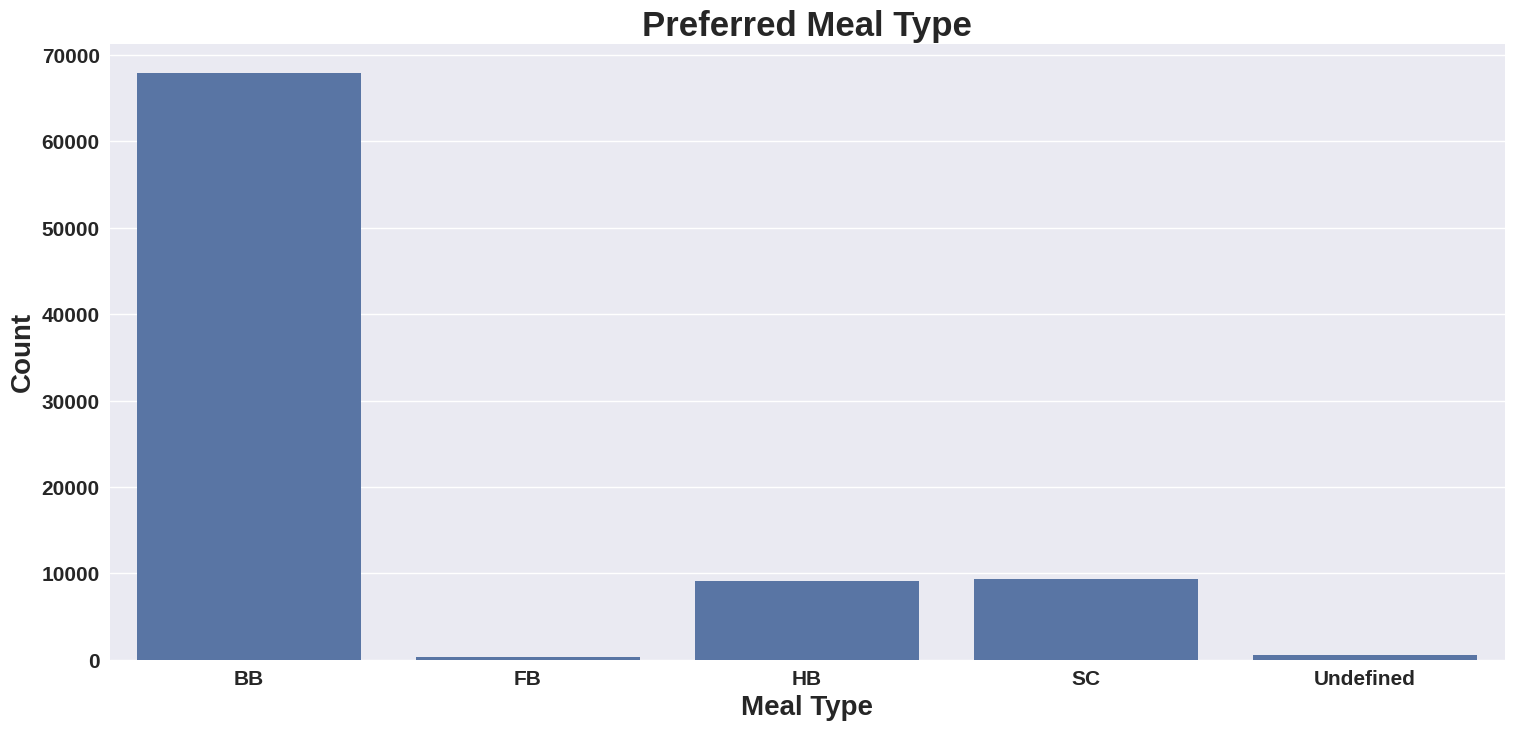

In [37]:
# df1['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize=(18,8))

sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

**Observation**

bar plot is used for comparisons betwwen categories.


* So the most preferred meal type by the guests is BB( Bed and Breakfast)

* HB- (Half Board) and SC- (Self Catering) are equally preferred.

It will help us to know which type food will prefed by the customers.

9)Which is the most preferred room type by the customers??

---



Text(0.5, 1.0, 'Most preferred Room type')

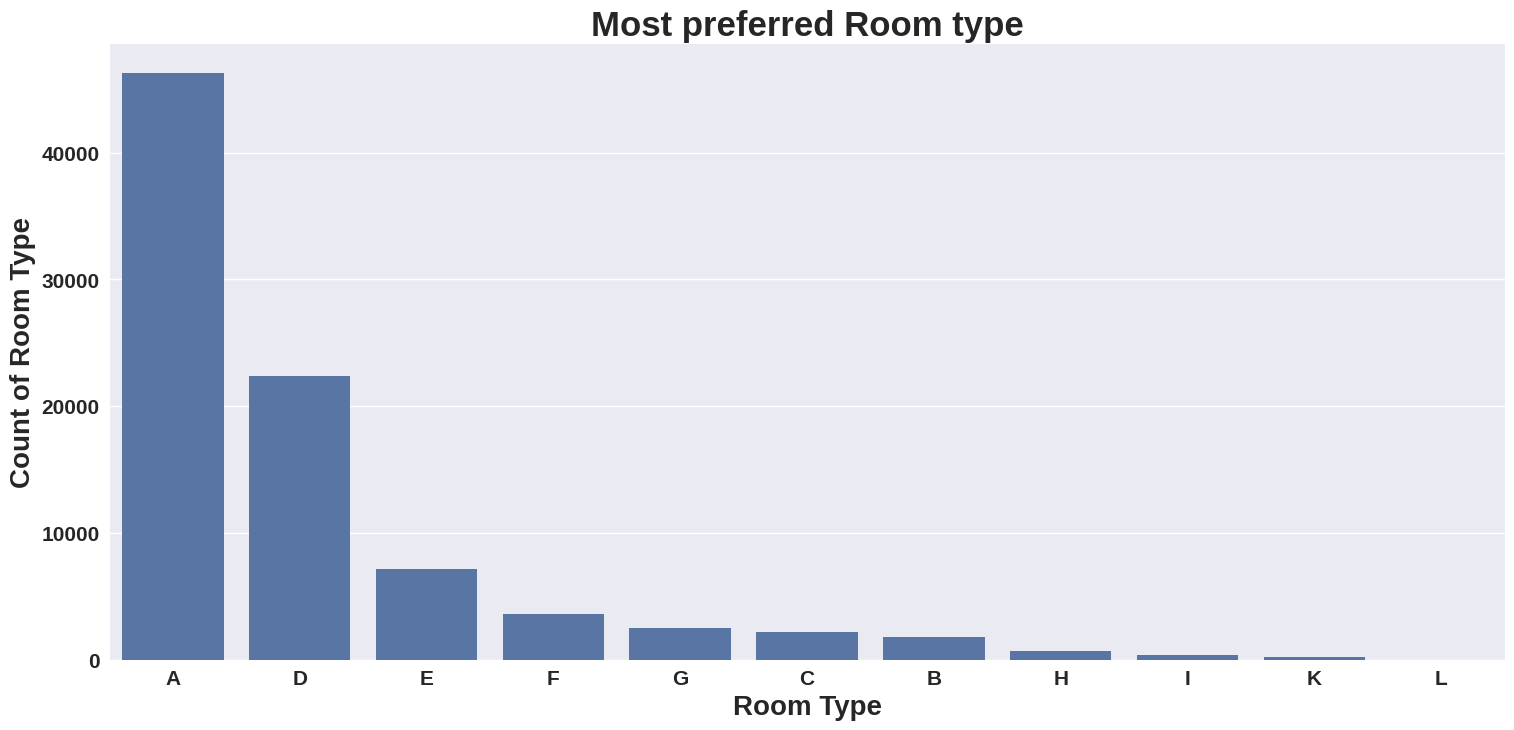

In [39]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")


**Observation**

So the most preferred Room type is "A".

It will help us to improve the services as for the customer conforts.


10)In which month most of the bookings happened?

In [40]:
# groupby arrival_date_month and taking the hotel count

bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

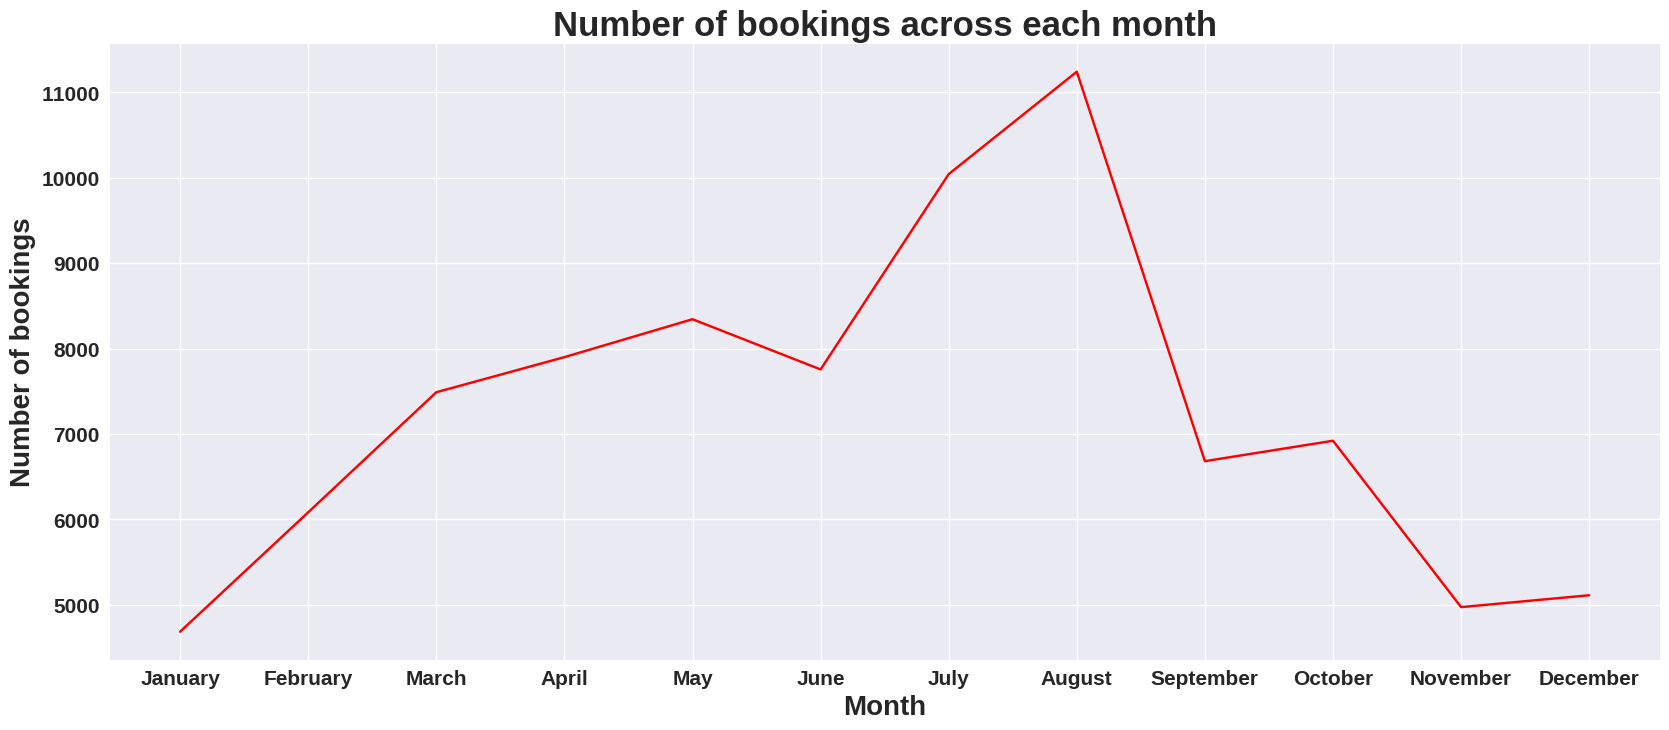

In [41]:
# set plot size

plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'], color='red')

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

**Observation**

Li ne chart is useful for showing trends over the time.

July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

11)Which year had the highest bookings?

Text(0.5, 1.0, 'Year Wise bookings')

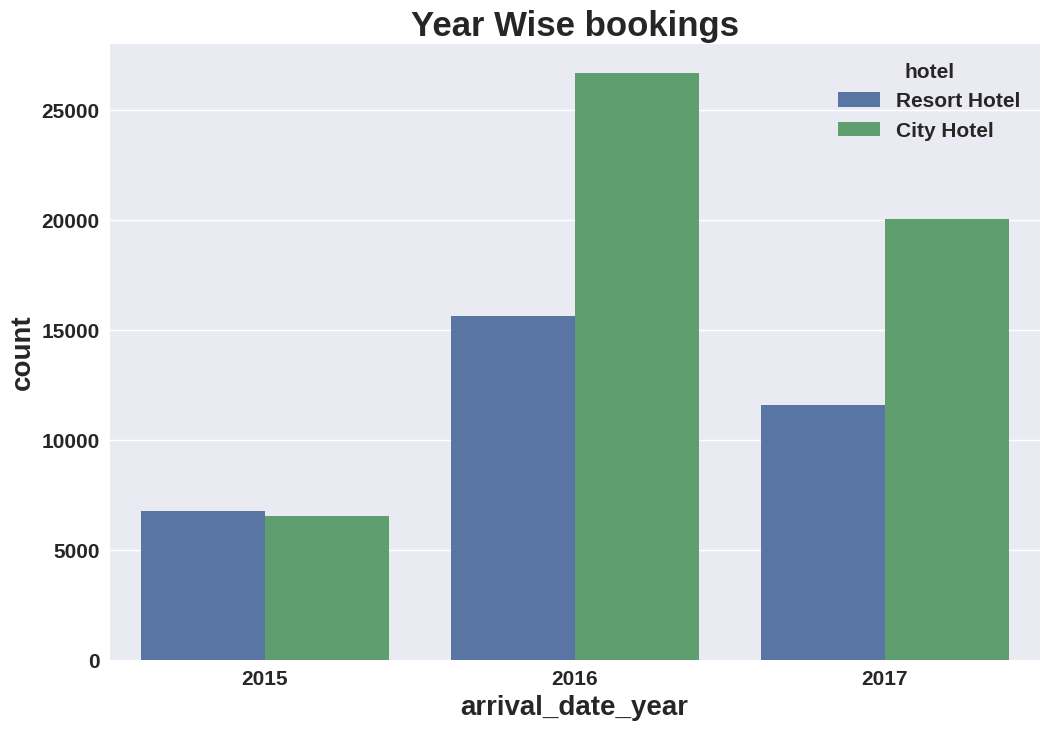

In [42]:

# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")


**Observation**

It will be easy to categarize the yearwise bookings.

2016 had the higest bookings.

2015 had lessthan 7000 bookings.

overall City hotels had the most of the bookings.

**Bivariate and Multivariate Analysis**

Bivariate analysis is a statistical analysis technique that involves analyzing the relationship between two variables in a dataset. The goal of bivariate analysis is to better understand the association or correlation between the two variables and to identify any patterns or trends in the data.

12)Which Hotel type has the highest ADR?

In [43]:
# group by hotel
grup_by_hotel=df1.groupby('hotel')

<Axes: title={'center': 'Avg ADR of each Hotel type'}, xlabel='Hotel type', ylabel='ADR'>

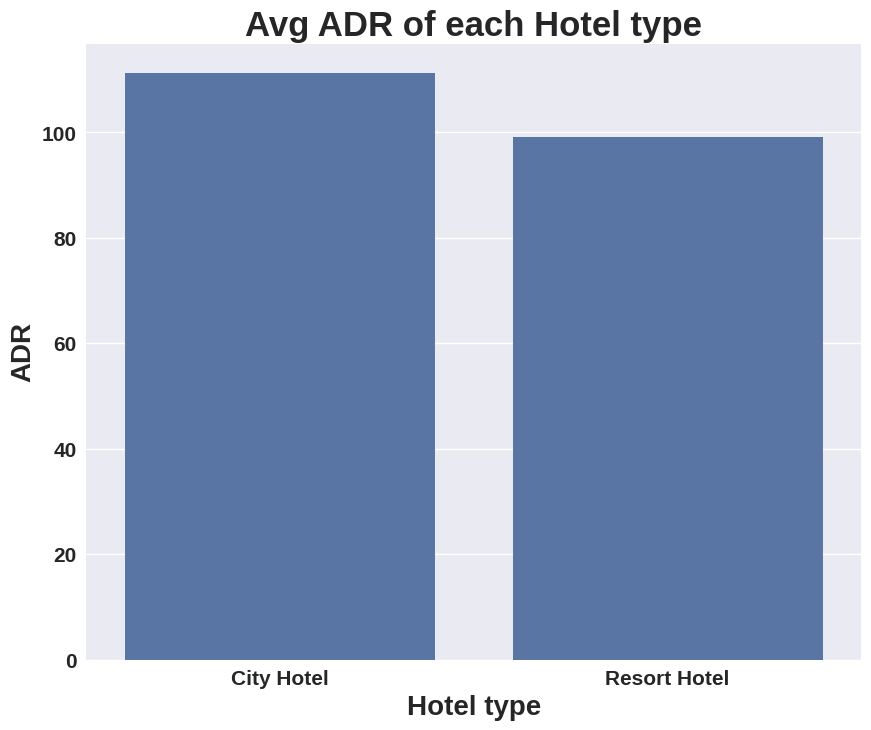

In [44]:
#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

**Observation**

City hotel has the highest ADR.

That means City hotels are generating more revenues than the Resort hotels.

Higher the ADR higher is the revenue.

13)Which hotel has highest percentage of booking cancellation?

Text(0.5, 1.0, 'Percentage of booking cancellation')

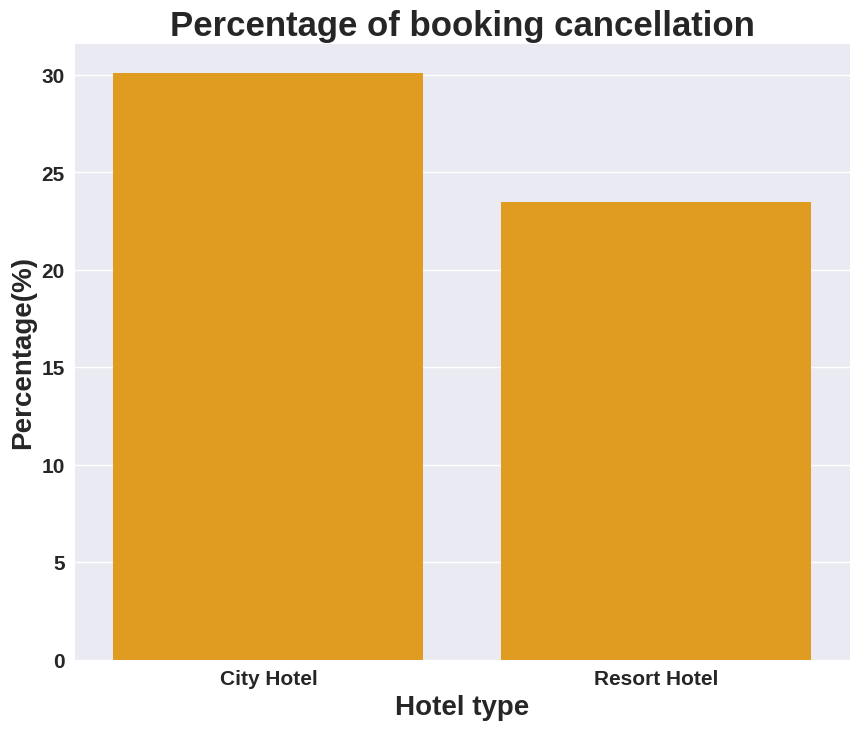

In [45]:
# booking canceled=1
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=df1[df1['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df1.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'], color='orange')

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

**Observation**

Bar plot is used for the categorical data.

The City hotel has the highest booking cancellation.

Because the City hotel have more bookings in parallel to that the cancellations are high.


14)Which hotel has longer waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

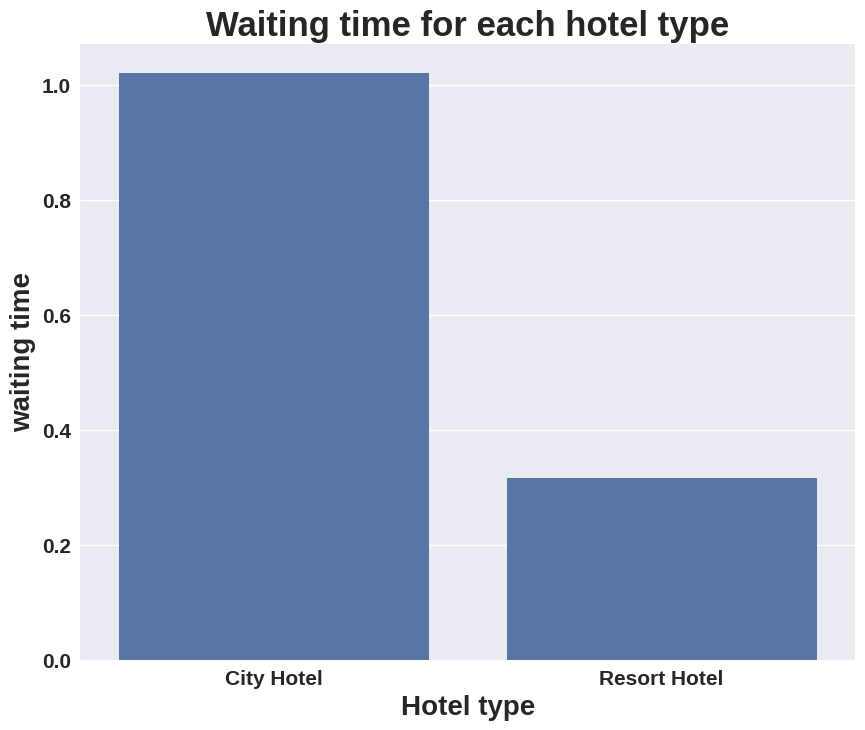

In [46]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")



**Observation**

Here, we divide data into two groups.

So the City Hotels has longer waiting period than the Resort Hotels.

Thus we can say that City Hotels are much busier than the Resort Hotels

Which Hotels has the most repeated guests?

Text(0.5, 1.0, 'Most repeated guests for each hotel')

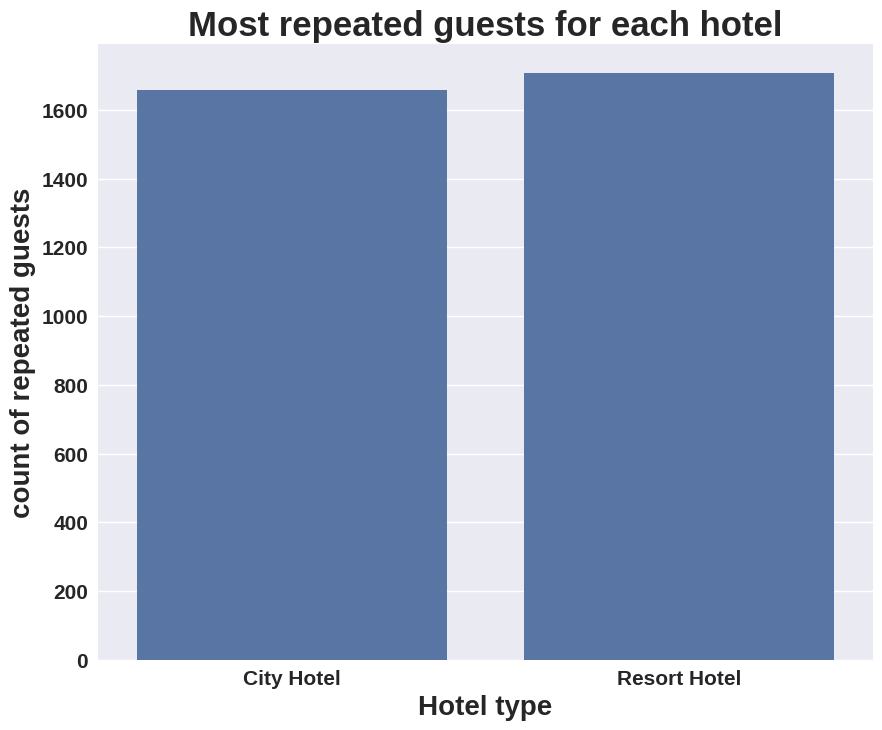

In [47]:
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=df1[df1['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

**Observation**

Resort Hotel has slightly more repeated guests than the City Hotels.

It is almost similar for both hotels.

15)ADR across the different months?

In [48]:
#groupby

bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df


,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


Text(0, 0.5, 'ADR')

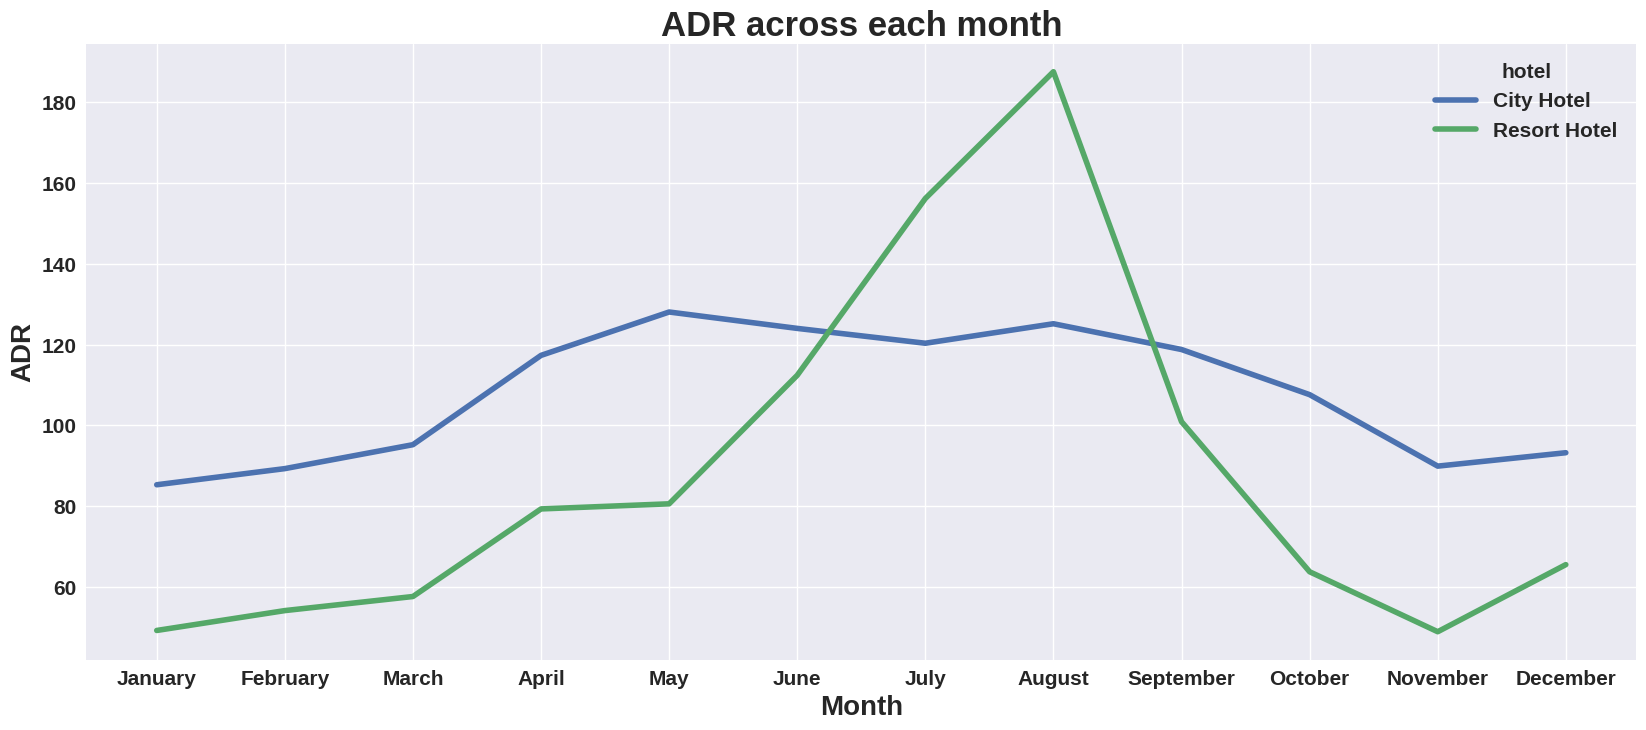

In [49]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'],linewidth=4)

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')


**Observation**

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

16) Which distribution channel contributed more to adr in order to increase the the income.?

Text(0.5, 1.0, 'ADR across Distribution channel')

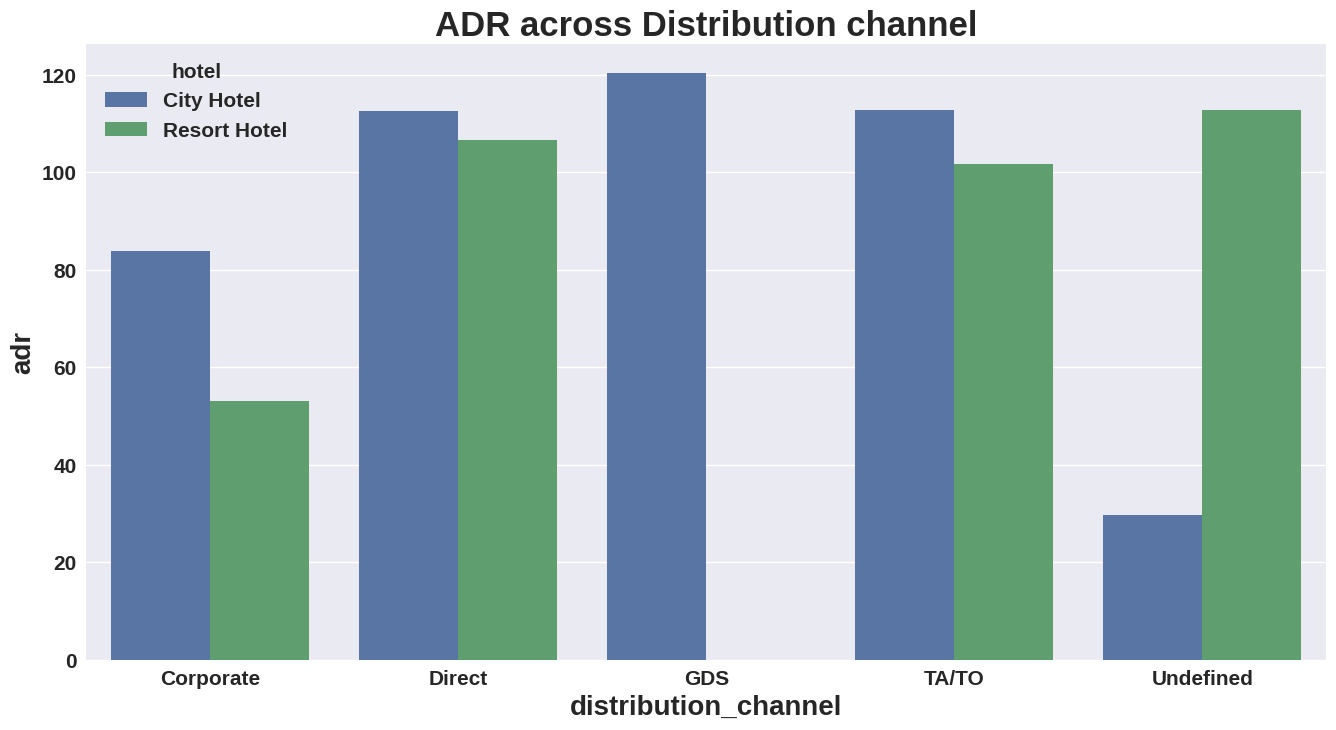

In [50]:
# group by distribution channel and hotel
distribution_channel_df=df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')




* Corporate- These are corporate hotel booing companies which makes bookings possible.

* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.

* Direct- means that bookings are directly made with the respective hotels
TA/TO- means that booings are made through travel agents or travel operators.

* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

**Observation**

Here, the data is categorizes as per different groups.


From the plot is clear that

'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.

GDS has highly contributed in adr in 'City Hotel' type.

GDS needs to increase Resort Hotel bookings.

17) Which distribution channel has the higest cancellation rate?

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

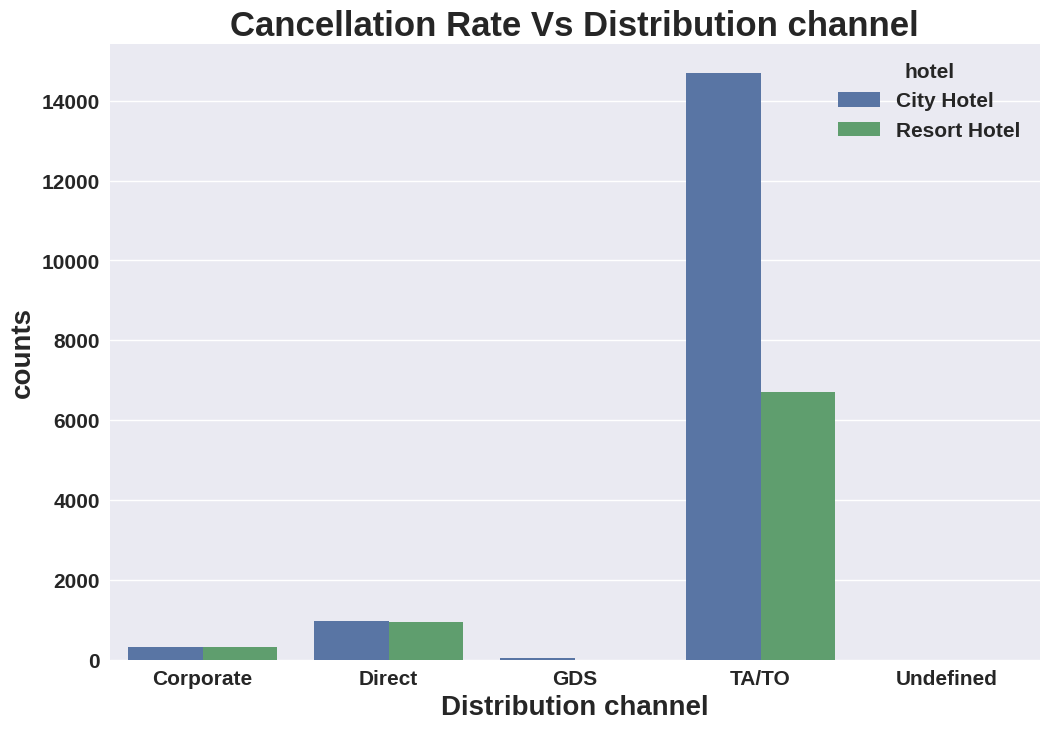

In [51]:
canceled_df=df1[df1['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

**Observation**

In "TA/TO", City hotels has the high cancellation rate compared to Resort hotels.

In "direct" both the hotels has almost same cancellation rate.

18) What is the Optimal stay length in both types of hotels ?

Text(0.5, 0, 'total_stay(days)')

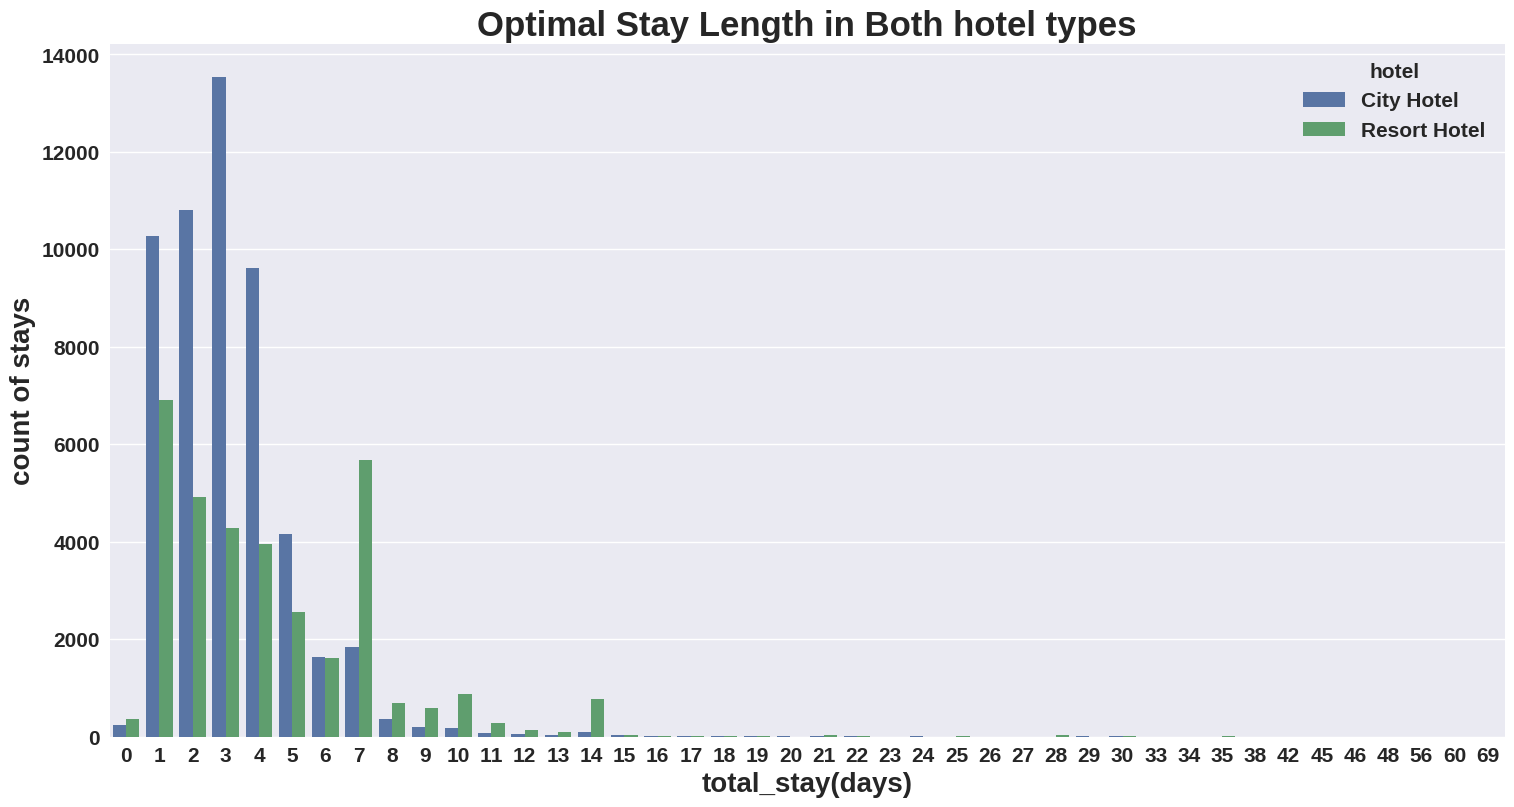

In [52]:

stay = df1.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns



# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')


**Observation**

Bar plot for categarizing the data into different groups.


Optimal stay in both the type hotel is less than 7 days.

Relationship between ADR and total stay.

In [53]:

stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns



In [54]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = df1.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,212.06,City Hotel
17996,7,212.10,Resort Hotel
17997,7,212.14,Resort Hotel
17998,7,212.29,City Hotel


Text(0.5, 1.0, 'Relationship between adr and total stay')

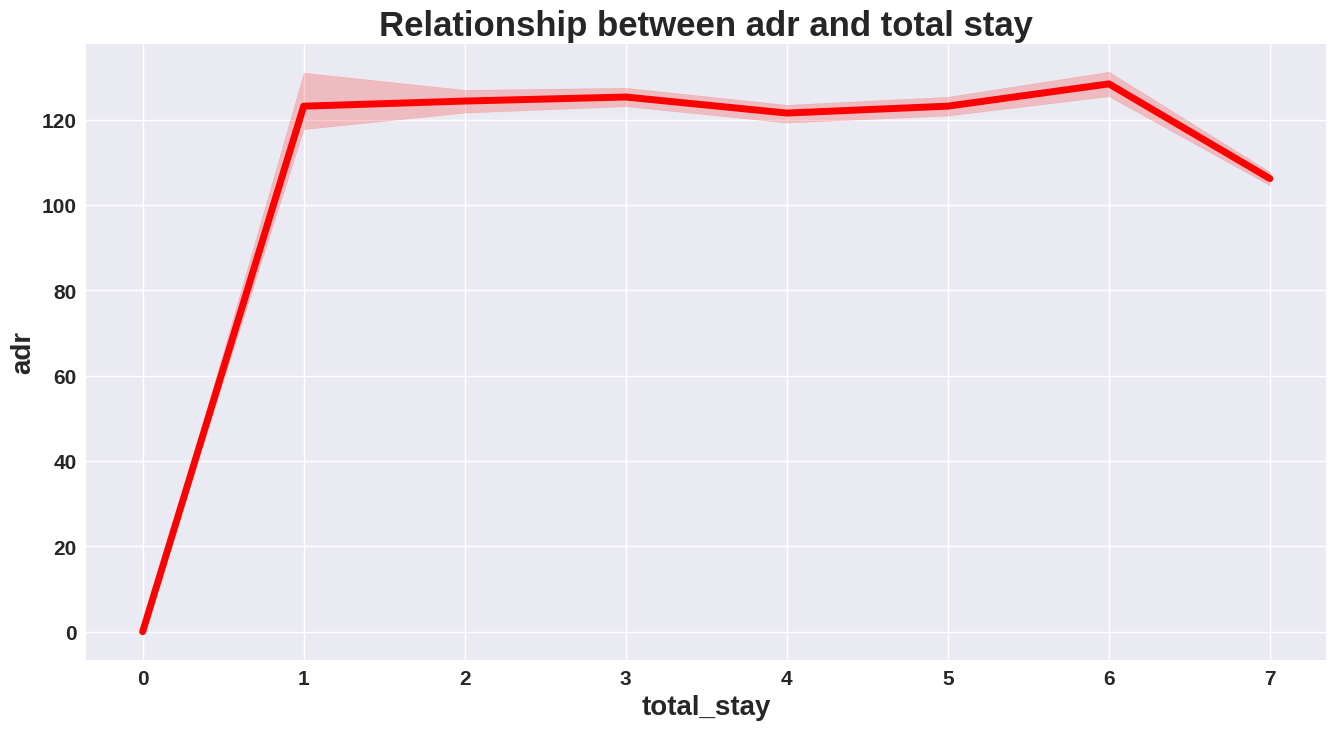

In [55]:
#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay,linewidth=5,color='red')
plt.title('Relationship between adr and total stay')

**Observation**

Line plot is suitable for the continuous data.

As the total stay increases the adr also increases.

Text(0.5, 1.0, 'Correlation of Numeric Columns')

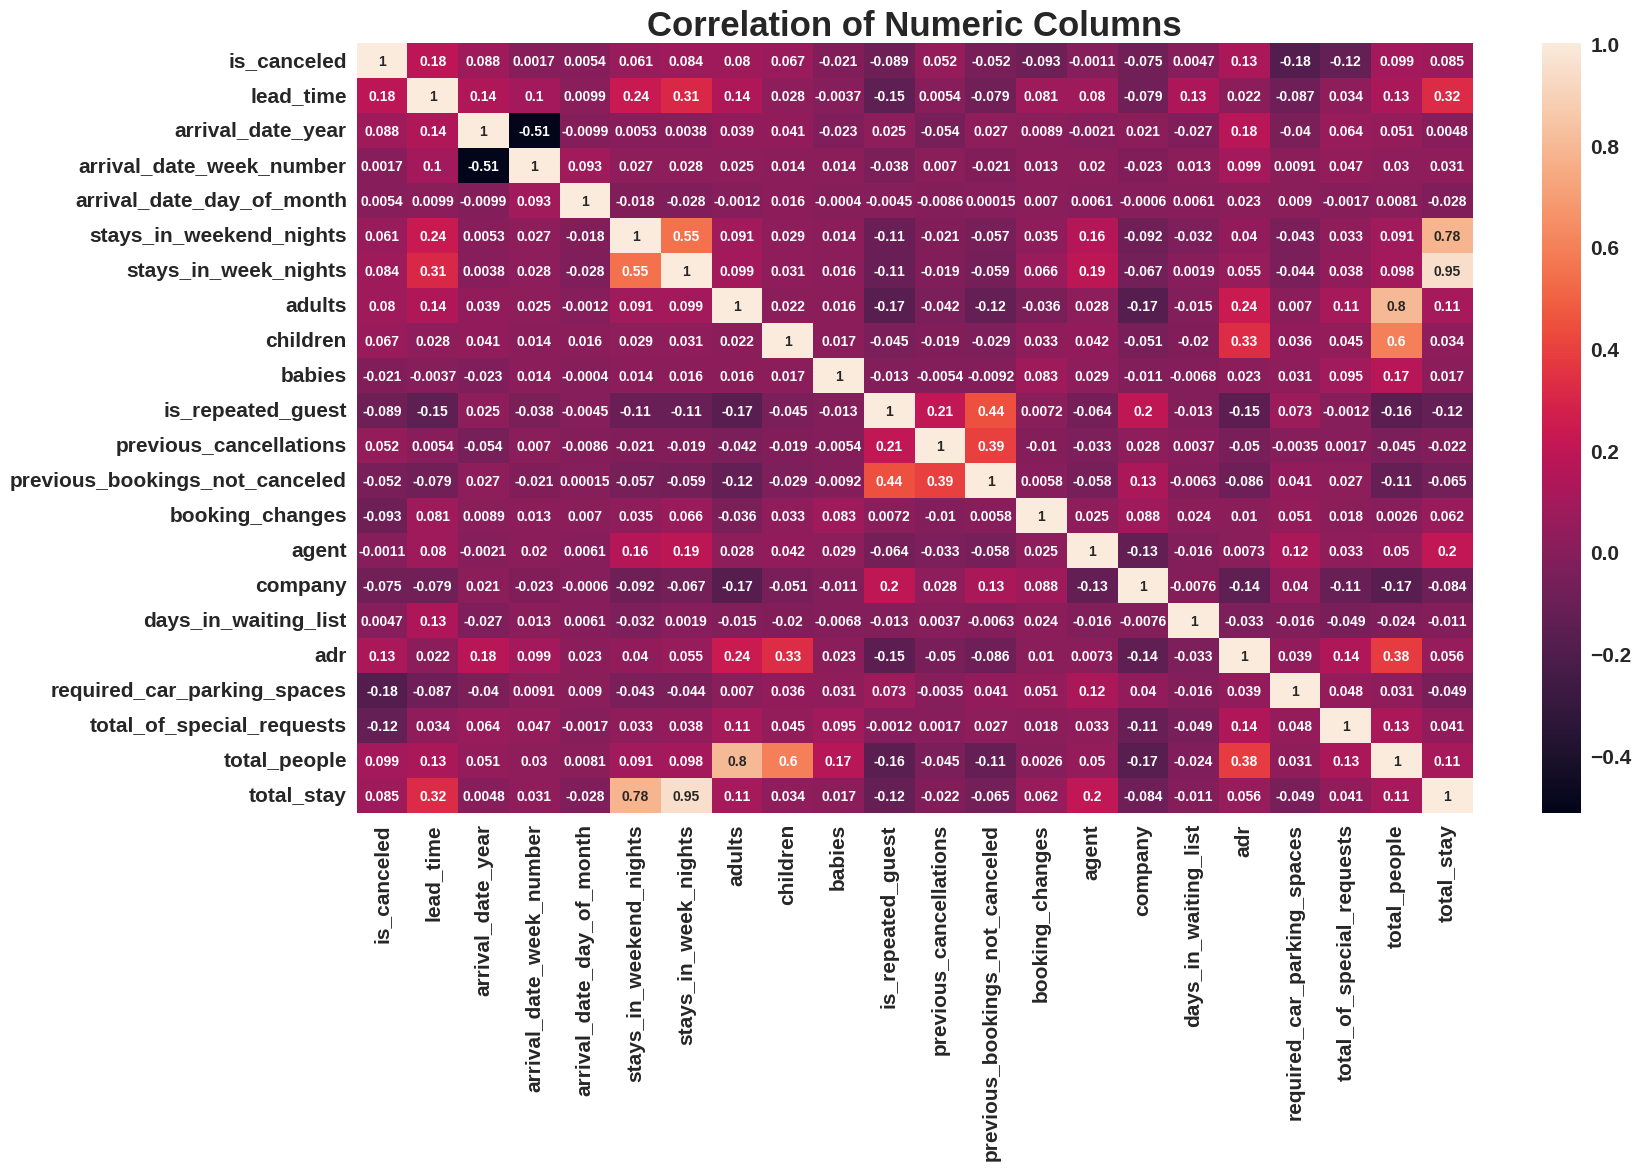

In [56]:
plt.figure(figsize=(18, 10))
sns.heatmap(df1.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlation of Numeric Columns')

1) is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.

2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.

3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

Relationship between the repeated guests and previous bookings not canceled.?

In [57]:
repeated_guests_df=df1[df1['is_repeated_guest']==1]
repeated_guests_df_1=df1[df1['is_repeated_guest']==0]


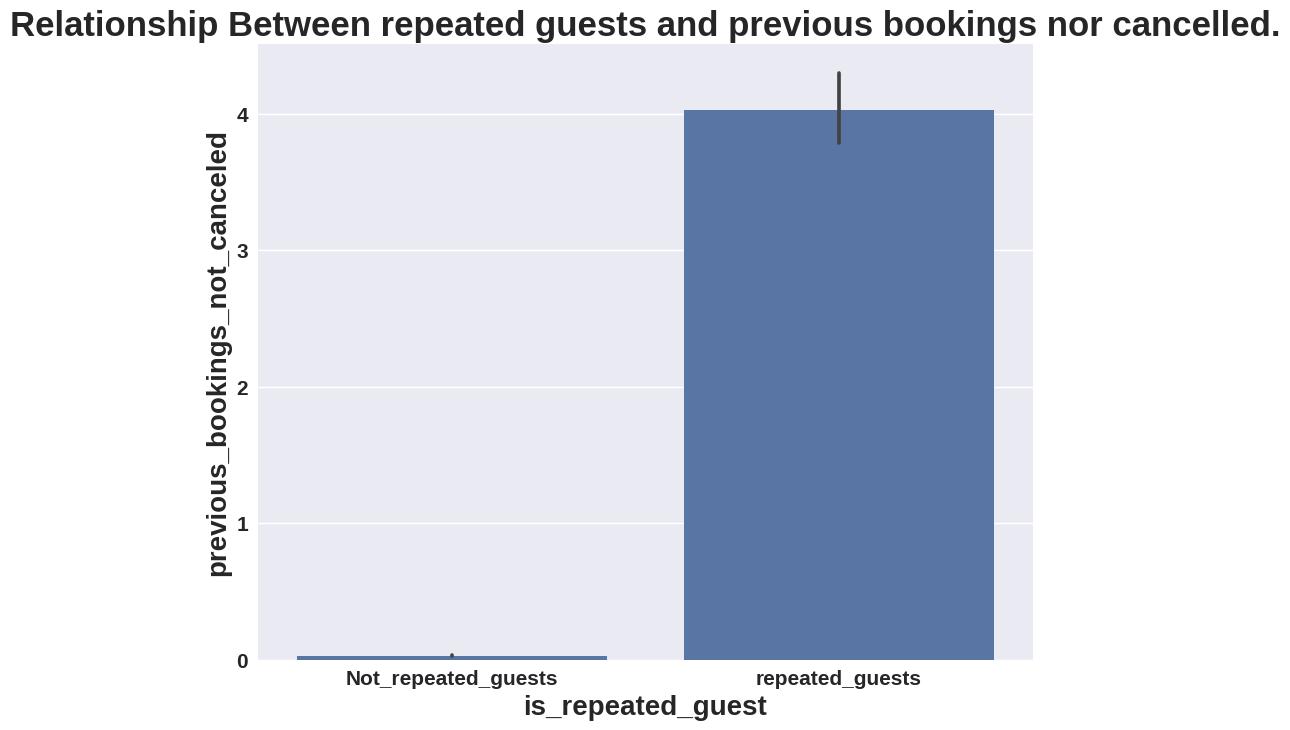

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()


**Observation**

Not Repeated guests are more likely to cancel their bookings.

Text(0.5, 1.0, 'Relationship between  adr and total stay')

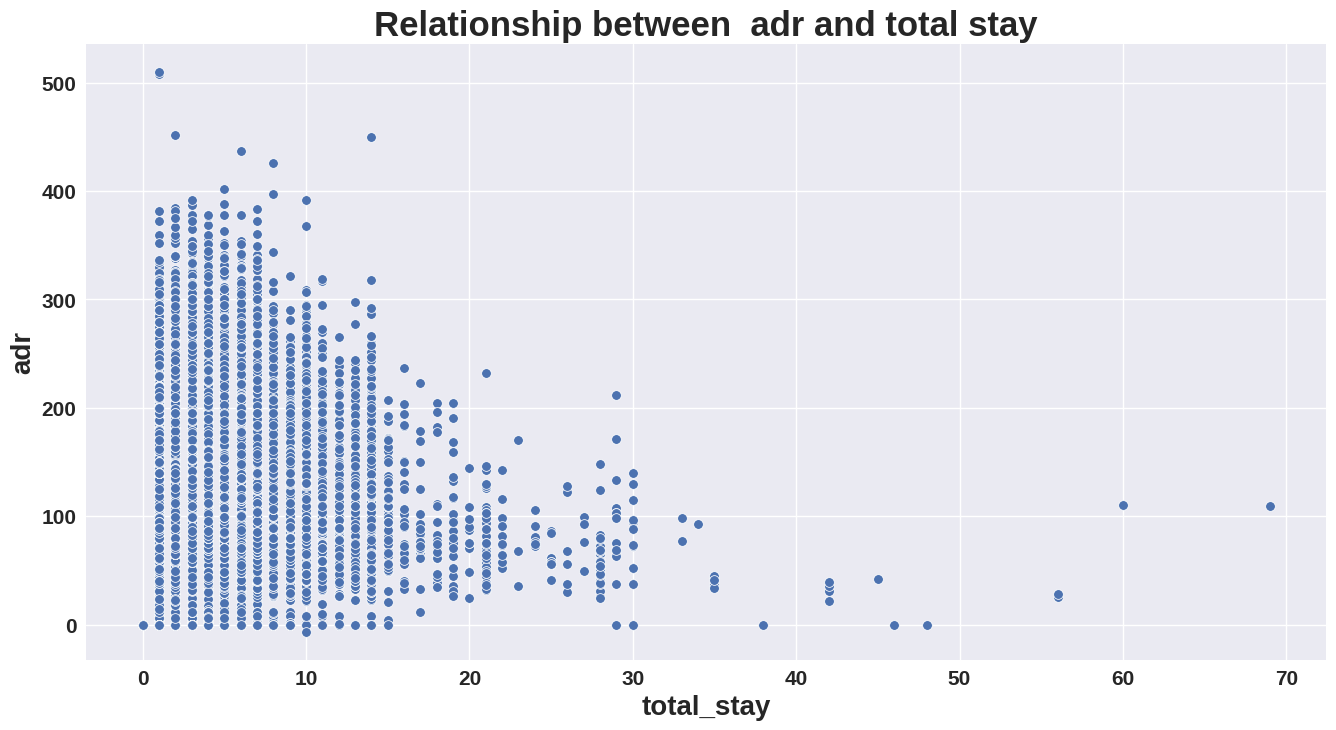

In [59]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)


plt.figure(figsize=(16,8))
sns.scatterplot(x=df1['total_stay'],y=df1['adr'])
plt.title('Relationship between  adr and total stay')


The above is used to show relationship between the adr and Total stay.

From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

ADR relationship with total number of people

Text(0.5, 1.0, 'ADR v/s Total Number of people')

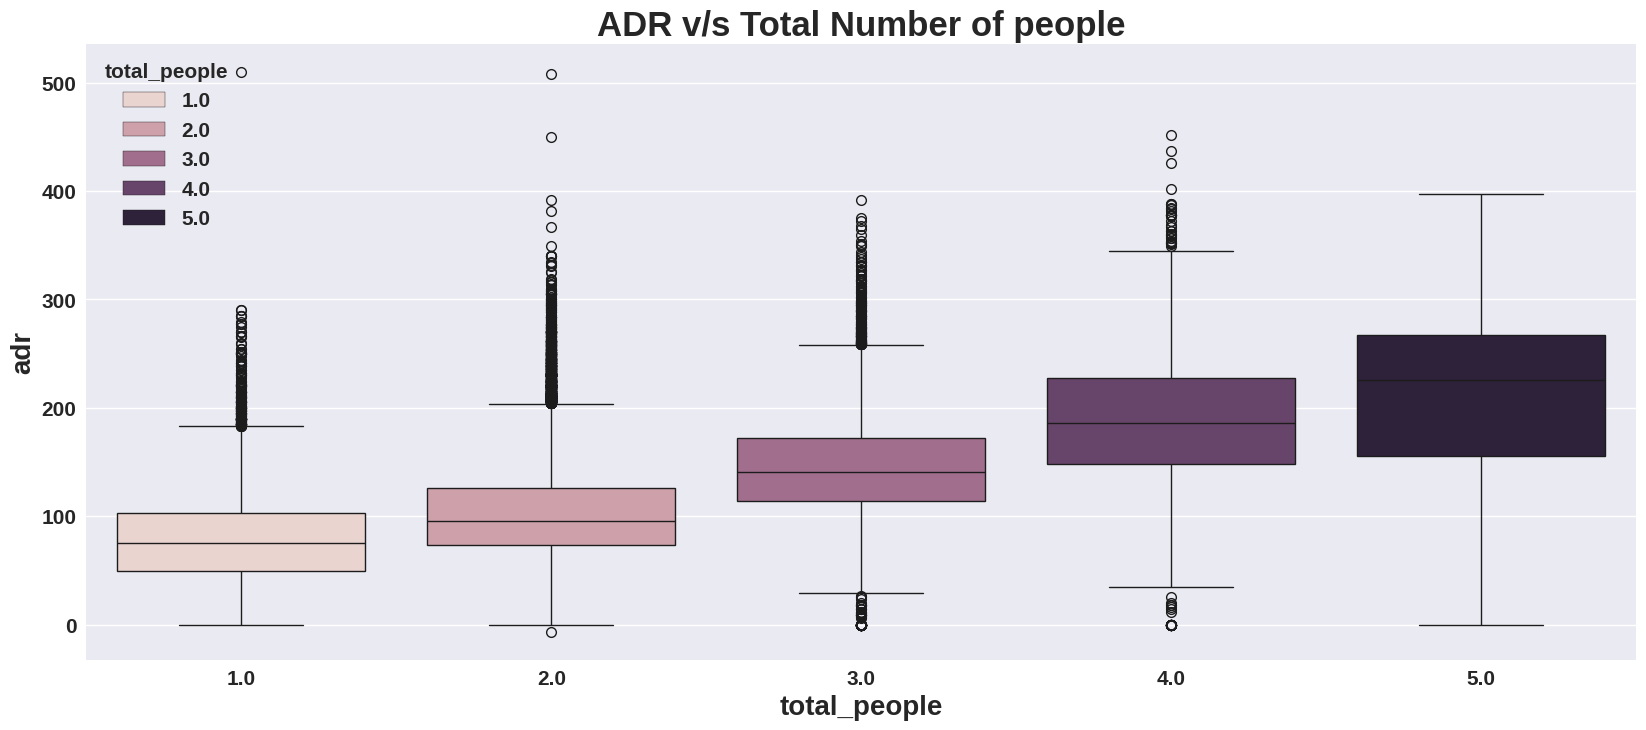

In [60]:

plt.figure(figsize=(20,8))
df2=df1[df1['total_people'] < 6]

sns.boxplot(x=df2['total_people'],y=df2['adr'], hue=df2['total_people'])

# set lables
plt.title('ADR v/s Total Number of people')


As the total number of people increases adr also increases.

Thus adr and total people are directly proportional to each other.

# Conclusions:



1. The guests showed a preference for City hotels, making it the busiest type of hotel.

2. Agent ID no: 9 made most of the bookings

3. 27.5 % of all bookings were cancelled.

4. Only 3.9 % of guests revisited the hotels, indicating a low retention rate.

5. Over 82 % of bookings had 0 changes made, while around 10% had single changes made.

6. The majority of customers (91.6 %) did not require car parking spaces. it tells us that people may come from longer distance(national or international).

7. Almpost(98.7 %)  all of the guests prefer "No deposit" type of deposit.

8. Bed & Breakfast (BB) was the most preferred meal type among guests.

9. "A" the most preferred Room type, which may be more luxiries with best servies.

10. July and August months had the most Bookings, Summer vaccation can be the reason for the bookings.

11. Most bookings for City hotels were made in 2016.

12. City hotels generated more revenue than Resort hotels, with higher average ADR.

13. Resort hotels had a higher booking cancellation rate of almost 30%.

14. Waiting time was higher for City hotels compared to Resort hotels, indicating City hotels were busier.

15. Many of the Customers/People wants to spend their Summer vaccation in Resorts Hotels.

16. Resort hotels had the highest number of repeated guests.


17. The optimal stay for both types of hotels was less than 7 days, with people typically staying for a week.

In conclusion, the analysis reveals a correlation between average daily rate (ADR) and group size, indicating that smaller groups tend to stay longer and pay higher rates. Summer vacations drive most bookings, but guests typically opt for shorter stays. These insights aid hotel management in understanding customer preferences and optimizing services to attract and retain guests effectively.
